Hello and welcome to my sentiment analysis project. I will be analyzing a dataset of tweets about chatGPT, which can be found on kaggle here: https://www.kaggle.com/datasets/charunisa/chatgpt-sentiment-analysis

This dataset contains a month's worth of tweets about chatGPT sampled in early 2023. NLP sentiment analysis was performed on the tweets, assigning them 'good', 'neutral', or 'bad' sentiments. There are two columns- Labels and Tweets

Labels (Sentiment):
Good = 1
Neutral = 0
Bad = -1

Tweets:
Textual data of the tweets

Let's check out the data

In [553]:
import pandas as pd

df=pd.read_csv("gpt_raw_tweets.csv")
print(df.info())
print(df.head())

#i am going to take a sample of this dataset for now because it is very big
df=df[:50000]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219294 entries, 0 to 219293
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  219294 non-null  int64 
 1   tweets      219294 non-null  object
 2   labels      219294 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.0+ MB
None
   Unnamed: 0                                             tweets   labels
0           0  ChatGPT: Optimizing Language Models for Dialog...  neutral
1           1  Try talking with ChatGPT, our new AI system wh...     good
2           2  ChatGPT: Optimizing Language Models for Dialog...  neutral
3           3  THRILLED to share that ChatGPT, our new model ...     good
4           4  As of 2 minutes ago, @OpenAI released their ne...      bad


I'm going to drop that "Unnamed: 0" column since we don't need it.

In [554]:
df=df.drop(df.columns[0], axis=1)

Let's check out the distribution of sentiments

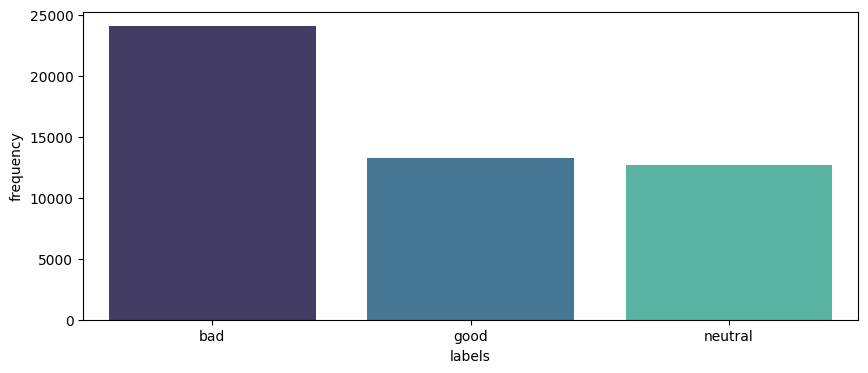

In [555]:
import matplotlib.pyplot as plt
import seaborn as sns

#create new df to count frequency 
count=df['labels'].value_counts()
countdf=count.reset_index()
countdf.columns=['labels', 'frequency']

plt.figure(figsize = (10,4))
sns.barplot(data=countdf, x='labels', y='frequency', palette='mako')
plt.xticks(rotation=0)
plt.show()

It looks like roughly half our tweets are negative, and the other half are either good or neutral. Good and neutral have about the same count.

Let's replace this text data with numerical data. We will assign values good=1, neutral=0, and bad=-1

In [556]:
#a method to replace sentiment text with numerical data
def encoder(x):
    if x=='good':
        return 1
    elif x=='bad':
        return -1
    else:
        return 0

df['labels'] = df['labels'].apply(encoder)

OK, let's check the first 10 tweets

In [557]:
print("Dirty tweets:")
for i in df.tweets.head(10):
    print('\n', i)

Dirty tweets:

 ChatGPT: Optimizing Language Models for Dialogue https://t.co/K9rKRygYyn @OpenAI

 Try talking with ChatGPT, our new AI system which is optimized for dialogue. Your feedback will help us improve it. https://t.co/sHDm57g3Kr

 ChatGPT: Optimizing Language Models for Dialogue https://t.co/GLEbMoKN6w #AI #MachineLearning #DataScience #ArtificialIntelligence\n\nTrending AI/ML Article Identified &amp; Digested via Granola; a Machine-Driven RSS Bot by Ramsey Elbasheer https://t.co/RprmAXUp34

 THRILLED to share that ChatGPT, our new model optimized for dialog, is now public, free, and accessible to everyone. https://t.co/dyvtHecYbd https://t.co/DdhzhqhCBX https://t.co/l8qTLure71

 As of 2 minutes ago, @OpenAI released their new ChatGPT. \n\nAnd you can use it right now 👇 https://t.co/VyPGPNw988 https://t.co/cSn5h6h1M1

 Just launched ChatGPT, our new AI system which is optimized for dialogue: https://t.co/ArX6m0FfLE.\n\nTry it out here: https://t.co/YM1gp5bA64

 As of 2 minute

This text data is quite dirty. We can observe above the things that need to be cleaned- links, hashtags, emojis, @ signs, newlines, extra spaces.....

In [558]:
#defining a function that will clean these tweets
import re

def tweetcleaner(df, column):
    #convert all text to lowercase
    df[column] = df[column].str.lower()
    #remove newlines
    df[column] = df[column].str.replace(r"\S+\\nhttp\S+", "", regex=True)
    df[column] = df[column].str.replace(r"(\\n*)\S+", " ", regex=True)
    #remove urls
    df[column] = df[column].str.replace(r"\S+http\S+", "", regex=True)
    df[column] = df[column].str.replace(r"http\S+", "", regex=True)
    df[column] = df[column].str.replace(r"http", "", regex=True)
    #remove @ signs
    df[column] = df[column].str.replace(r"@\S+", "", regex=True)
    #remove words with numbers inside words
    df[column] = df[column].str.replace(r'\w*[0-9]\w*', "", regex=True)
    #remove emojis and leftover punctuations
    df[column] = df[column].str.replace(r"[^A-Za-z0-9()!?@\'\`\"\_]", " ", regex=True)
    df[column] = df[column].str.replace(r"[!\"#\$%&\'\(\)\*\+,-\./:;<=>\?@\[\\\]\^_`{\|}~]", "", regex=True)
    #change multiple spaces to single spaces
    df[column] = df[column].str.replace(r'\s+', " ", regex=True)
    #remove all single characters
    df[column] = df[column].str.replace(r'\s+[a-zA-Z]\s+', ' ', regex=True)
    
    return df

#apply this function to our df
df = tweetcleaner(df, 'tweets')

print("Clean tweets:")

for i in df.tweets.head(10):
    print('\n', i)

Clean tweets:

 chatgpt optimizing language models for dialogue 

 try talking with chatgpt our new ai system which is optimized for dialogue your feedback will help us improve it 

 chatgpt optimizing language models for dialogue ai machinelearning datascience artificialintelligence ai ml article identified amp digested via granola machine driven rss bot by ramsey elbasheer 

 thrilled to share that chatgpt our new model optimized for dialog is now public free and accessible to everyone 

 as of minutes ago released their new chatgpt you can use it right now 

 just launched chatgpt our new ai system which is optimized for dialogue it out here 

 as of minutes ago released their new chatgpt you can use it right now 

 chatgpt coming out strong refusing to help me stalk someone but agreeing providing that someone is waldo 

  just deployed thing ive been helping build the last couple of months its chatbot based on gpt im really excited to share this 

 research preview of our newest mo

Next, I am going to remove the stop words from our data.

In [559]:
from nltk.corpus import stopwords

#set up list of stopwords
custom_stop_words=['amp', 'u']
stop_words = list(stopwords.words('english')) + custom_stop_words

#remove
df['tweets'] = df['tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

Removing these unnecessary words will simplify our text analysis and give us more useful information. I also removed some words I saw popping up throughout the analysis, including 'amp' which was often used to replace an ampersand, and 'u'. The stop words I removed are words like:

In [560]:
print(stop_words[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


Let's make sure we don't have any nulls after all that data manipulation

In [561]:
import numpy as np

#replace blank data with null
df = df.replace('', np.nan)
column_names=list(df.columns.values)

for item in column_names:
    print(item, 'nulls:', df[item].isna().sum())

tweets nulls: 17
labels nulls: 0


Let's drop those rows that are now null after the cleaning process.

In [562]:
dropping=df['tweets'].isna()
df=df.drop(df[dropping].index)

for item in column_names:
    print(item, 'nulls:', df[item].isna().sum())

tweets nulls: 0
labels nulls: 0


Looking much better! Now we can export these clean tweets.

In [563]:
df.to_csv("clean_tweets.csv")

Now I'm going to make a word cloud to visualize the words we're working with

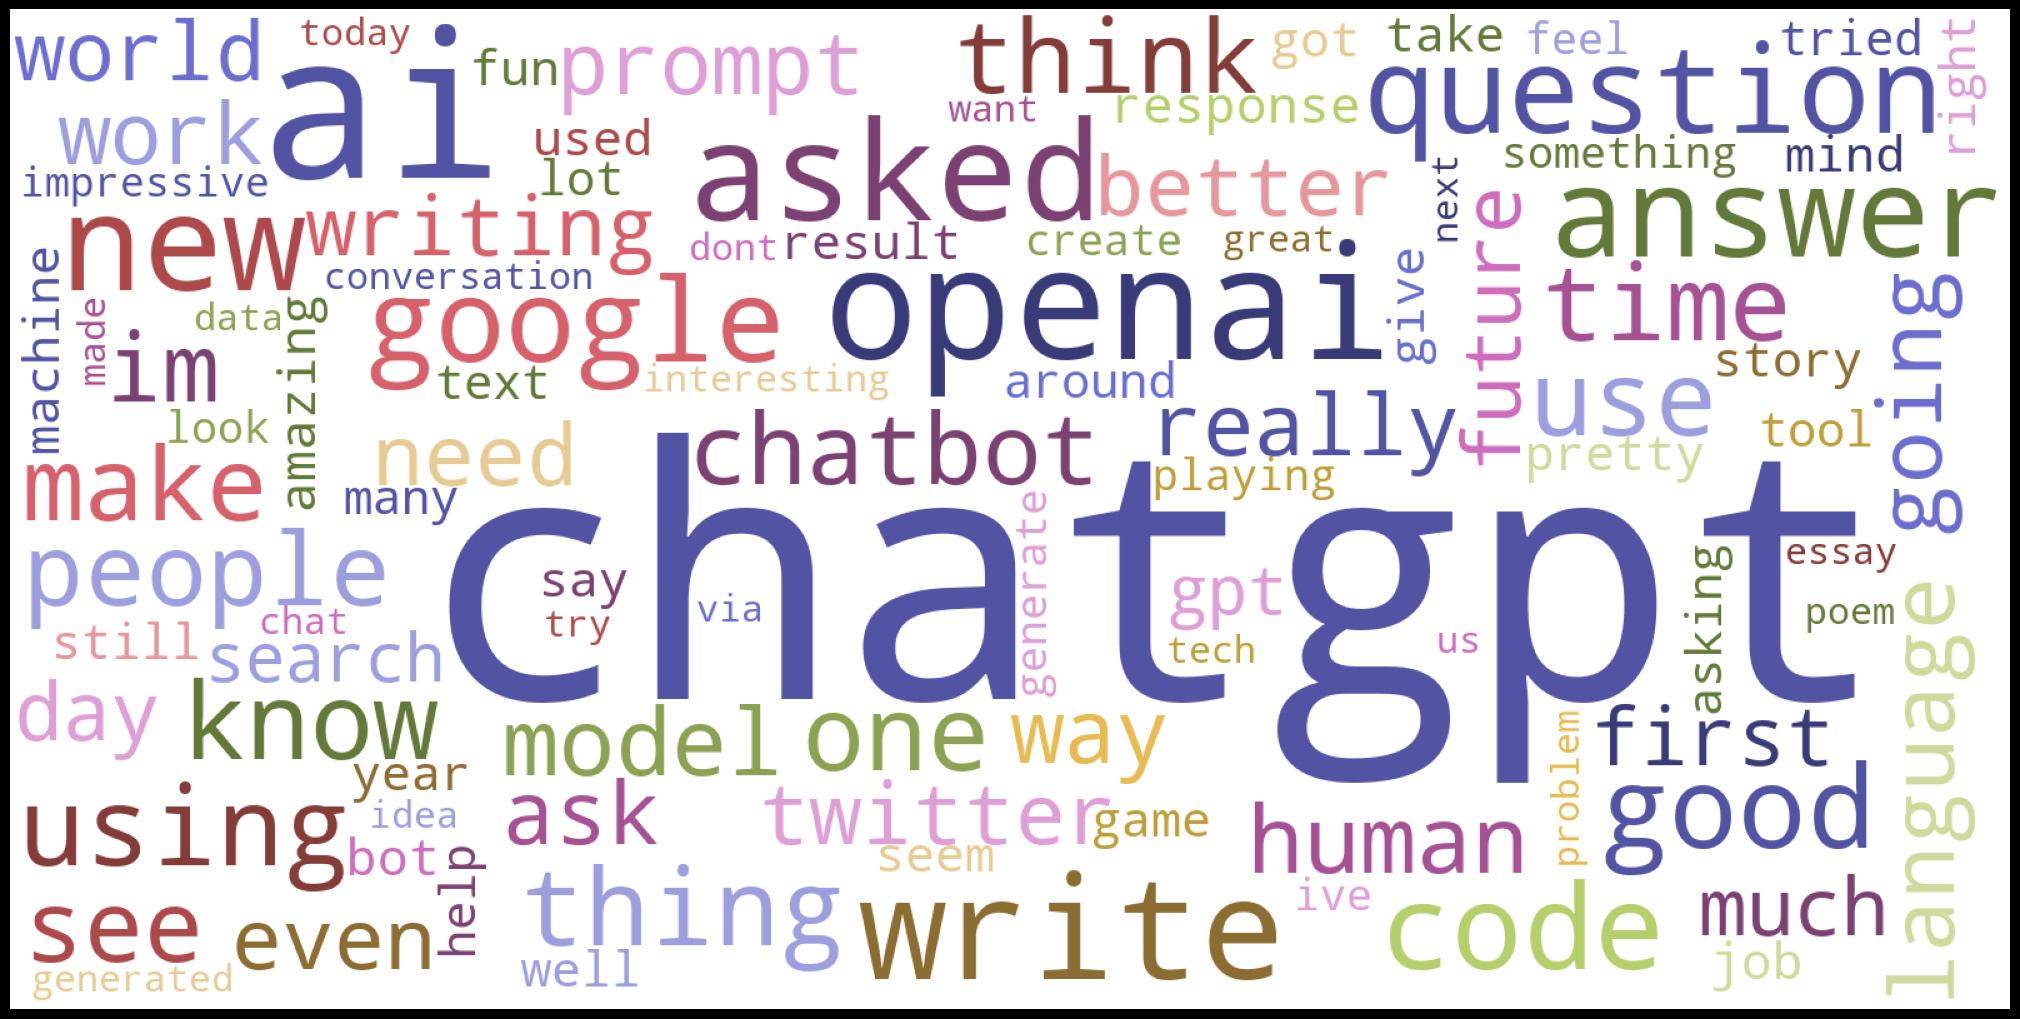

In [564]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#create a variable that is a long string with all the words in the text column
df['tweets'] = df['tweets'].astype(str)
text = ' '.join(df['tweets'])

#create wordcloud
cloud = WordCloud(collocations = False, width=1600, height=800, max_words=100, colormap='tab20b', background_color = 'white', random_state = 42).generate(text)

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Now I will tokenize the data to explore tweet length and frequency distribution of words. The tokenization process turns the tweet data into a list of individual tokens, or words.

In [565]:
from nltk.tokenize import RegexpTokenizer

#create tokenizer object
tokenizer = RegexpTokenizer(r'\w+')
df['tokens']=df['tweets'].apply(tokenizer.tokenize)
print(df.head())

                                              tweets  labels  \
0        chatgpt optimizing language models dialogue       0   
1  try talking chatgpt new ai system optimized di...       1   
2  chatgpt optimizing language models dialogue ai...       0   
3  thrilled share chatgpt new model optimized dia...       1   
4         minutes ago released new chatgpt use right      -1   

                                              tokens  
0  [chatgpt, optimizing, language, models, dialogue]  
1  [try, talking, chatgpt, new, ai, system, optim...  
2  [chatgpt, optimizing, language, models, dialog...  
3  [thrilled, share, chatgpt, new, model, optimiz...  
4  [minutes, ago, released, new, chatgpt, use, ri...  


Let's see how long our tweets are:

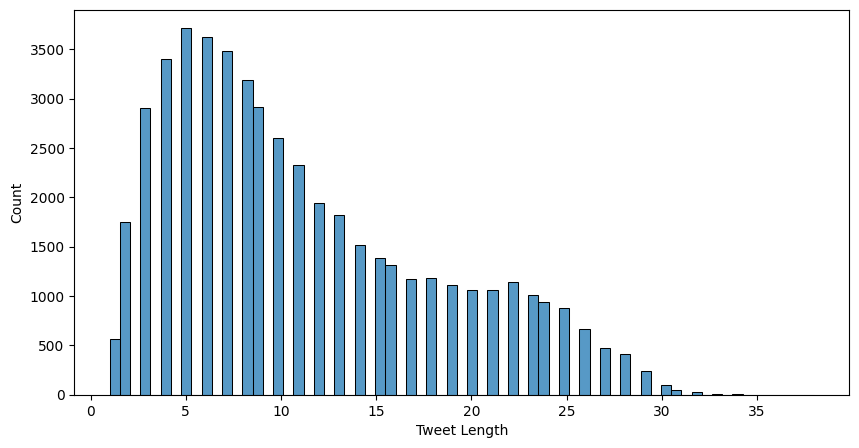

In [566]:
length = [len(tokens) for tokens in df['tokens']]
plt.figure(figsize = (10,5))
sns.histplot(data=length)
plt.xlabel('Tweet Length')
plt.show()

This histogram shows the distribution of tweet lengths. Most tweets (after cleaning and removal of stop words) are less than 20 words long. 

We saw some information about the most popular words on the word cloud, but I want to calculate the frequency distribution 

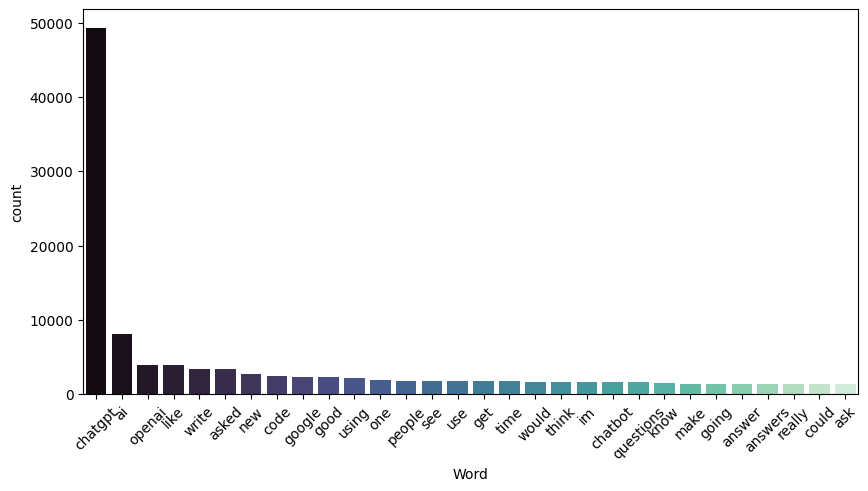

In [567]:
import itertools

#turn the tokens into a list for analysis
words = [word for word in df['tokens']]
words =list(itertools.chain.from_iterable(words))

#calculate frequency distribution and store it in a new dataframe
from nltk.probability import FreqDist
top_30 = FreqDist(words).most_common(30)
top_30_df=pd.DataFrame(top_30,columns=['word','count'])

plt.figure(figsize = (10,5))
sns.barplot(data=top_30_df, x=top_30_df['word'], y=top_30_df['count'], palette='mako')
plt.xlabel('Word')
plt.xticks(rotation = 45)
plt.show()

Next I will split the data into training and testing sets.

In [568]:
from sklearn.model_selection import train_test_split

#split features and targets
x = df['tweets']
y= df['labels']

#split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

print(x_train.info())

#to csv
x_train.to_csv('x_train_clean.csv')
x_test.to_csv('x_test_clean.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')

(37487,) (37487,)
(12496,) (12496,)
<class 'pandas.core.series.Series'>
Int64Index: 37487 entries, 23868 to 15801
Series name: tweets
Non-Null Count  Dtype 
--------------  ----- 
37487 non-null  object
dtypes: object(1)
memory usage: 585.7+ KB
None


I am going to test out two vectorization methods and see which is more accurate: count vectorizer/bag of words, and tfidf model. First we will load in the csv files and vectorize them both ways.

In [569]:
x_train = pd.read_csv('x_train_clean.csv', dtype=str)
x_test = pd.read_csv('x_test_clean.csv', dtype=str)
y_train = pd.read_csv('y_train.csv', dtype=str)
y_test = pd.read_csv('y_test.csv', dtype=str)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#count vectorization
cv=CountVectorizer(lowercase=False)
x_train_cv =cv.fit_transform(x_train['tweets'].values.astype('U'))
x_test_cv = cv.transform(x_test['tweets'].values.astype('U'))

#tfidf vectorization
vec = TfidfVectorizer(lowercase=False, min_df=2)
x_train_tfidf =vec.fit_transform(x_train['tweets'].values.astype('U'))
x_test_tfidf = vec.transform(x_test['tweets'].values.astype('U'))

print(x_train_cv.shape)
print(type(x_train_cv))

print(x_train_tfidf.shape)
print(type(x_train_tfidf))


(37487, 27168)
<class 'scipy.sparse._csr.csr_matrix'>
(37487, 13745)
<class 'scipy.sparse._csr.csr_matrix'>


We can see that our count and tdidf vectors are in a scipy sparse matrix, and the output is in the format we expected. 

We are going to fit this matrix to a simple logistic regression model using the sag solver.

In [570]:
from sklearn.linear_model import LogisticRegressionCV

logr = LogisticRegressionCV(solver='sag')

#cv
logr.fit(x_train_cv, y_train['labels'])
y_pred_cv = logr.predict(x_test_cv)
print(y_pred_cv)

#tfidf
logr.fit(x_train_tfidf, y_train['labels'])
y_pred_tfidf = logr.predict(x_test_tfidf)
print(y_pred_tfidf)

['1' '-1' '-1' ... '0' '1' '0']
['1' '-1' '-1' ... '0' '1' '0']


Let's see the accuracy scores and reports from this

In [571]:
from sklearn.metrics import accuracy_score, classification_report

#CV Eval
print('Count Vectorizer Accuracy: ', accuracy_score(y_test['labels'], y_pred_cv))
print('\nCount Vectorizer Classification Report: \n' , classification_report(y_test['labels'],  y_pred_cv))

#tfidf eval
print('TDIDF Accuracy: ', accuracy_score(y_test['labels'], y_pred_tfidf))
print('\nTFIDF Classification Report: \n' , classification_report(y_test['labels'],  y_pred_tfidf))

Count Vectorizer Accuracy:  0.8286651728553137

Count Vectorizer Classification Report: 
               precision    recall  f1-score   support

          -1       0.88      0.93      0.91      6024
           0       0.71      0.67      0.69      3169
           1       0.84      0.79      0.81      3303

    accuracy                           0.83     12496
   macro avg       0.81      0.80      0.80     12496
weighted avg       0.83      0.83      0.83     12496

TDIDF Accuracy:  0.8079385403329066

TFIDF Classification Report: 
               precision    recall  f1-score   support

          -1       0.85      0.94      0.90      6024
           0       0.69      0.58      0.63      3169
           1       0.81      0.77      0.79      3303

    accuracy                           0.81     12496
   macro avg       0.79      0.77      0.77     12496
weighted avg       0.80      0.81      0.80     12496



The count vectorizer method gives us an accuracy score of 82%, while the tfidf method gives an accuracy score of 80%. It looks like the count vectorizer method is slightly better here.